In [1]:
%pip install pandas matplotlib seaborn


You should consider upgrading via the 'c:\Users\bageg\Desktop\10 Academy\SolarRadiationDataAnalysis\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# Import nessacary librarys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np 


In [2]:
# Data Loading
# Get the current directory of the script
current_dir = os.getcwd()

# Navigate to the data folder from the script folder
data_folder = os.path.join(current_dir, '../data')

# Load the data from the CSV file
df = pd.read_csv(os.path.join(data_folder, 'benin-malanville.csv'))

In [3]:
# Checking Data structure
# Display the first few rows of the DataFrame
df.head()

# Get an overview of the DataFrame structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
# Summary Statics
# Calculate summary statistics for numeric columns
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
# Data Cleaning
# Check for missing values
df.isnull().sum()

# Handle missing values remove column
df.drop(columns='Comments', inplace=True)


# z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI']])
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keeping entries where all z-scores are less than 3
# df = df[filtered_entries]

# Removing Duplicates
df.drop_duplicates(inplace=True)

df.describe()
# Correcting Incorrect Entries (example: replacing negative values with NaN)
# df[df < 0] = np.nan


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


# Removing Invalid values from the valid values of GHI DNI and DHI which are between 0 and 1361 (inclusive)

In [6]:
# Filter rows where all values in GHI, DNI, DHI are between 0 and 1361 (inclusive)
filtered_entries = ((df['GHI'] >= 0) & (df['GHI'] <= 1361) &
                    (df['DNI'] >= 0) & (df['DNI'] <= 1361) &
                    (df['DHI'] >= 0) & (df['DHI'] <= 1361))

# Keep only the filtered rows
df = df[filtered_entries]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 246871 entries, 413 to 525170
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      246871 non-null  object 
 1   GHI            246871 non-null  float64
 2   DNI            246871 non-null  float64
 3   DHI            246871 non-null  float64
 4   ModA           246871 non-null  float64
 5   ModB           246871 non-null  float64
 6   Tamb           246871 non-null  float64
 7   RH             246871 non-null  float64
 8   WS             246871 non-null  float64
 9   WSgust         246871 non-null  float64
 10  WSstdev        246871 non-null  float64
 11  WD             246871 non-null  float64
 12  WDstdev        246871 non-null  float64
 13  BP             246871 non-null  int64  
 14  Cleaning       246871 non-null  int64  
 15  Precipitation  246871 non-null  float64
 16  TModA          246871 non-null  float64
 17  TModB          246871 non-null  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
413,2021-08-09 06:54,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7
414,2021-08-09 06:55,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8
415,2021-08-09 06:56,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9
416,2021-08-09 06:57,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9
417,2021-08-09 06:58,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0


# Remove Outliners Using z-score

In [7]:
# Define a threshold (e.g., 3 standard deviations)
z_thresh = 3

# Calculate z-scores for GHI, DNI, DHI
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))

# Filter rows where any absolute z-score is above the threshold
filtered_entries = ~(z_scores > z_thresh).any(axis=1)
df = df[filtered_entries]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 246703 entries, 413 to 525170
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      246703 non-null  object 
 1   GHI            246703 non-null  float64
 2   DNI            246703 non-null  float64
 3   DHI            246703 non-null  float64
 4   ModA           246703 non-null  float64
 5   ModB           246703 non-null  float64
 6   Tamb           246703 non-null  float64
 7   RH             246703 non-null  float64
 8   WS             246703 non-null  float64
 9   WSgust         246703 non-null  float64
 10  WSstdev        246703 non-null  float64
 11  WD             246703 non-null  float64
 12  WDstdev        246703 non-null  float64
 13  BP             246703 non-null  int64  
 14  Cleaning       246703 non-null  int64  
 15  Precipitation  246703 non-null  float64
 16  TModA          246703 non-null  float64
 17  TModB          246703 non-null  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
413,2021-08-09 06:54,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7
414,2021-08-09 06:55,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8
415,2021-08-09 06:56,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9
416,2021-08-09 06:57,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9
417,2021-08-09 06:58,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0


# Time Series Analysis

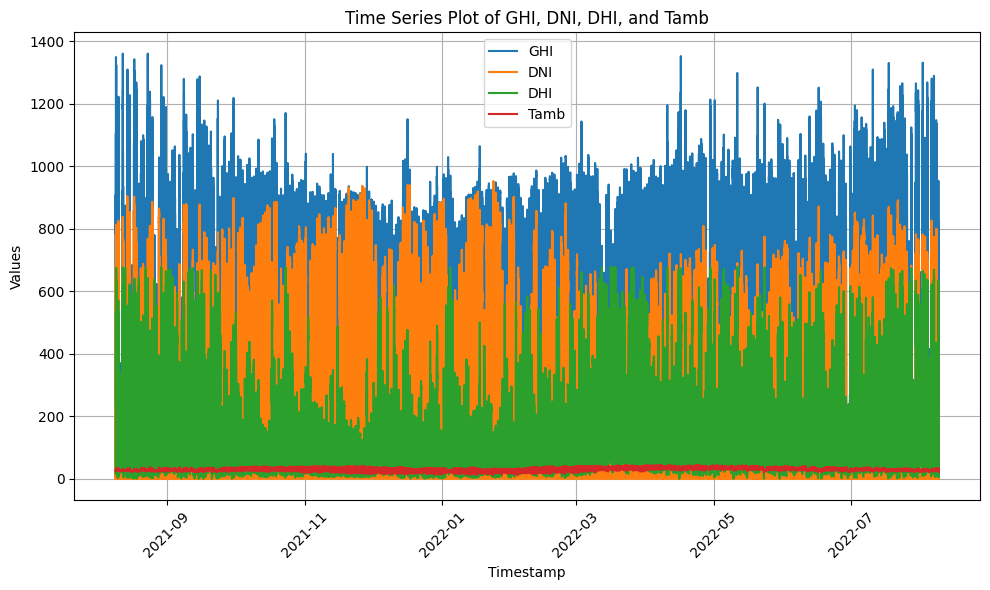

In [8]:
# Convert the Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')  # Assuming Tamb is temperature

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series Plot of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if many data points
plt.tight_layout()
plt.show()

# Correlation Analysis

In [10]:
# Calculate the correlation matrix
correlation_matrix = df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()

# Print the correlation matrix
correlation_matrix

,GHI,DHI,DNI,TModA,TModB
GHI,1.000000,0.617228,0.768115,0.876491,0.797733
DHI,0.617228,1.000000,0.031306,0.605899,0.526922
DNI,0.768115,0.031306,1.000000,0.625367,0.580110
TModA,0.876491,0.605899,0.625367,1.000000,0.957605
TModB,0.797733,0.526922,0.580110,0.957605,1.000000


# Adding Heatmap

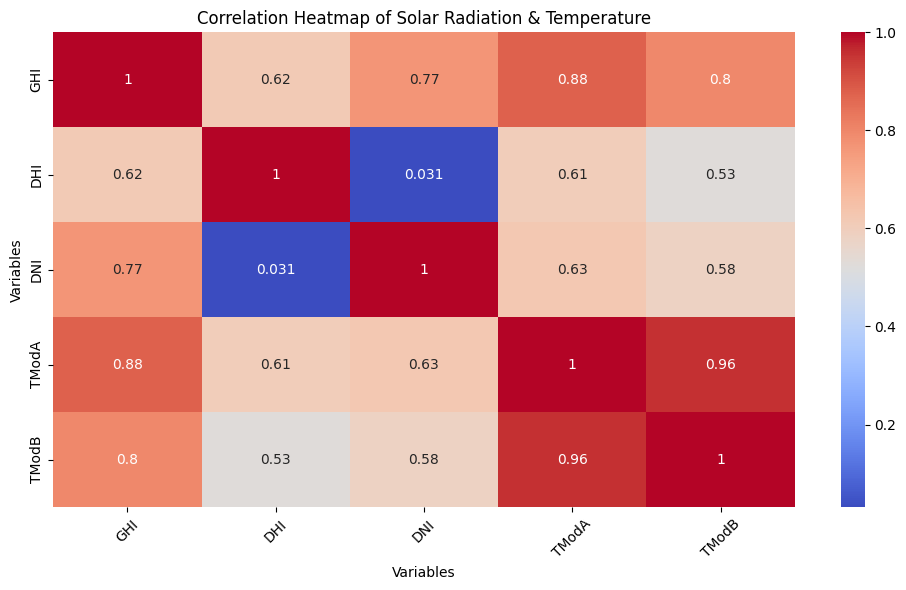

In [11]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # 'coolwarm' for colored heatmap

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Heatmap of Solar Radiation & Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Wind Analysis

In [12]:
# Descriptive statistics for wind variables
wind_stats = df[['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']].describe()
print(wind_stats)

                  WS         WSgust        WSstdev             WD  \
count  246703.000000  246703.000000  246703.000000  246703.000000   
mean        2.801884       3.721969       0.587278     160.342601   
std         1.540890       1.899077       0.249755      95.552577   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.700000       2.400000       0.400000      76.400000   
50%         2.700000       3.600000       0.600000     161.300000   
75%         3.800000       4.900000       0.700000     240.900000   
max        16.000000      22.300000       3.400000     360.000000   

             WDstdev  
count  246703.000000  
mean       11.925292  
std         6.248198  
min         0.000000  
25%         8.500000  
50%        11.400000  
75%        14.700000  
max        99.400000  


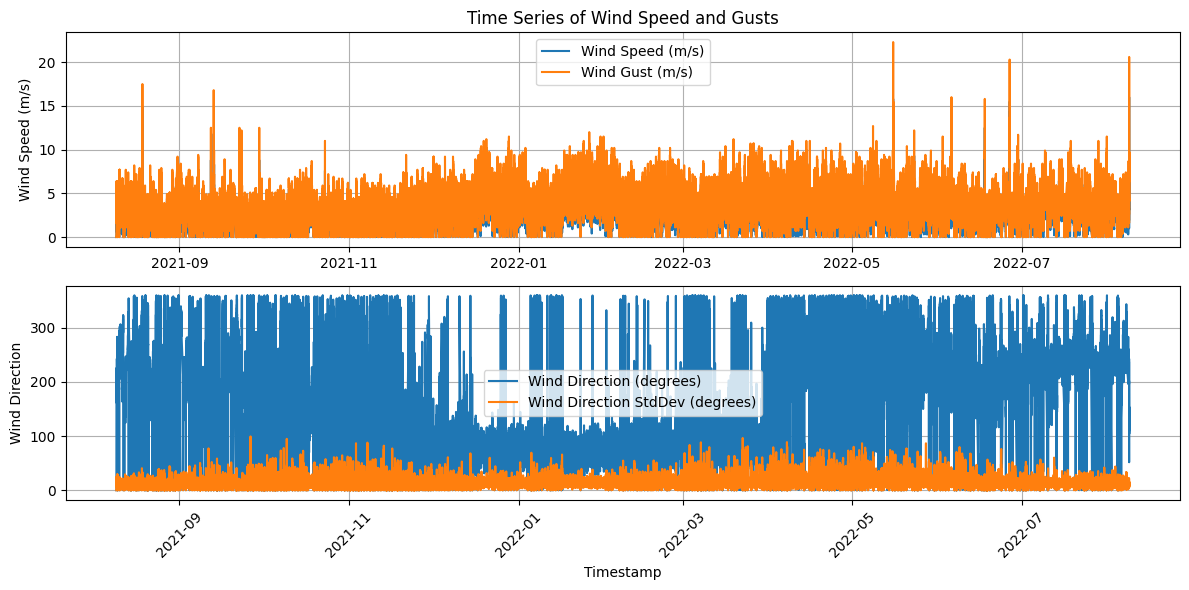

In [13]:
# Visualize wind speed and direction changes over time using line plots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.subplot(211)  # Create a subplot for wind speed and gusts
plt.plot(df['Timestamp'], df['WS'], label='Wind Speed (m/s)')
plt.plot(df['Timestamp'], df['WSgust'], label='Wind Gust (m/s)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series of Wind Speed and Gusts')
plt.legend()
plt.grid(True)

plt.subplot(212)  # Create a subplot for wind direction and standard deviation
plt.plot(df['Timestamp'], df['WD'], label='Wind Direction (degrees)')
plt.plot(df['Timestamp'], df['WDstdev'], label='Wind Direction StdDev (degrees)')
plt.ylabel('Wind Direction')
plt.xlabel('Timestamp')  # X-axis label for the whole figure
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

<strong>Key Point: </strong> The combination of low wind speed and high wind gust suggests gusty winds. This means the wind speed fluctuates significantly, with short periods of strong winds (gusts) interrupting an otherwise calm or low-speed wind pattern.

<strong>Low Wind Direction Standard Deviation (WDstdev):</strong> This indicates the wind direction is relatively constant. A low standard deviation suggests the wind is blowing consistently from the same direction (indicated by the high wind direction value) with minimal variation.

<strong>In summary </strong>
The wind is predominantly blowing from a specific direction (high wind direction).
The wind speed is generally low, but there are occasional short bursts of strong winds (high wind gusts) exceeding the average speed.
The wind direction is consistent and doesn't change much over time (low wind direction standard deviation).

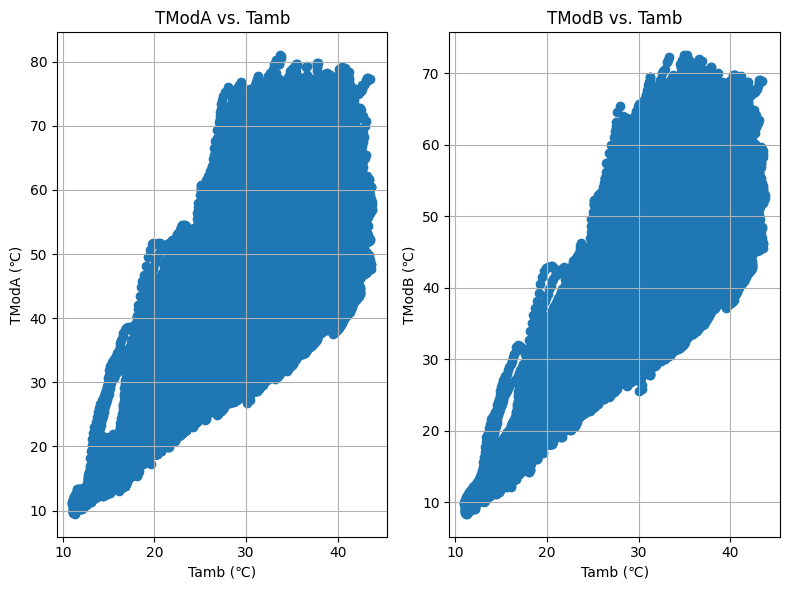

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.scatter(df['Tamb'], df['TModA'])
plt.xlabel('Tamb (℃)')
plt.ylabel('TModA (℃)')
plt.title('TModA vs. Tamb')
plt.grid(True)

plt.subplot(122)
plt.scatter(df['Tamb'], df['TModB'])
plt.xlabel('Tamb (℃)')
plt.ylabel('TModB (℃)')
plt.title('TModB vs. Tamb')
plt.grid(True)
plt.tight_layout()
plt.show()

Sensor Positioning: If the modules are positioned differently (e.g., one facing slightly more sunlight), the one receiving more direct sunlight will tend to be hotter.
Module Properties: Minor variations in module properties (even within the same model) can lead to slight differences in heat absorption and dissipation.
Measurement Error: While less likely, there's a small chance one sensor might be malfunctioning or experiencing a slight calibration error.
Impact on Correlation:

The strong positive correlation you observed in the scatter plot likely reflects the overall trend of both modules heating up with increasing ambient temperature.
However, the 10°C difference indicates there might be additional factors influencing individual module temperatures beyond just ambient temperature.

# Histograms

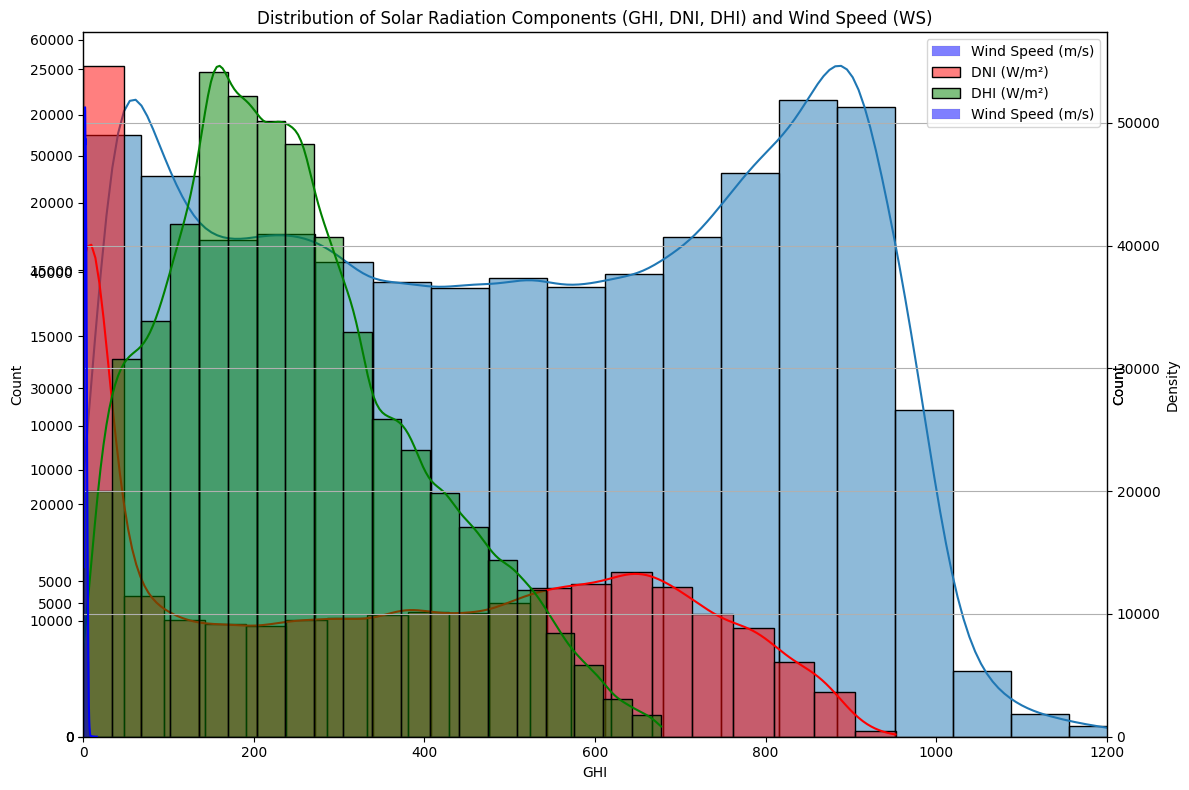

In [16]:
# Create a figure to arrange multiple histograms
plt.figure(figsize=(12, 8))

# GHI histogram
sns.histplot(df['GHI'], kde=True, bins=20, label='GHI (W/m²)')

# DNI histogram (on the same plot using twinx())
ax2 = plt.twinx()
sns.histplot(df['DNI'], kde=True, bins=20, ax=ax2, label='DNI (W/m²)', color='red')

# DHI histogram (on the same plot using twinx())
ax3 = plt.twinx()
sns.histplot(df['DHI'], kde=True, bins=20, ax=ax3, label='DHI (W/m²)', color='green')
plt.xlim([0, 1200])  # Adjust x-axis limits if needed for all histograms

# Wind Speed (WS) histogram (on the same axes)
ax4 = plt.twinx()
sns.histplot(df['WS'], kde=True, bins=20, ax=ax4, label='Wind Speed (m/s)', color='blue')
plt.xlim([0, None])  # Adjust x-axis limit for WS if needed

# Titles, labels, and legend
plt.xlabel('Solar Radiation (W/m²)')  # Adjust label if wind speed is on the x-axis
plt.ylabel('Density')
plt.title('Distribution of Solar Radiation Components (GHI, DNI, DHI) and Wind Speed (WS)')
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
plt.legend(lines1 + lines2 + lines3 + lines4, labels1 + labels2 + labels3 + labels4)
plt.grid(True)
plt.tight_layout()
plt.show()


# Bloc Plots

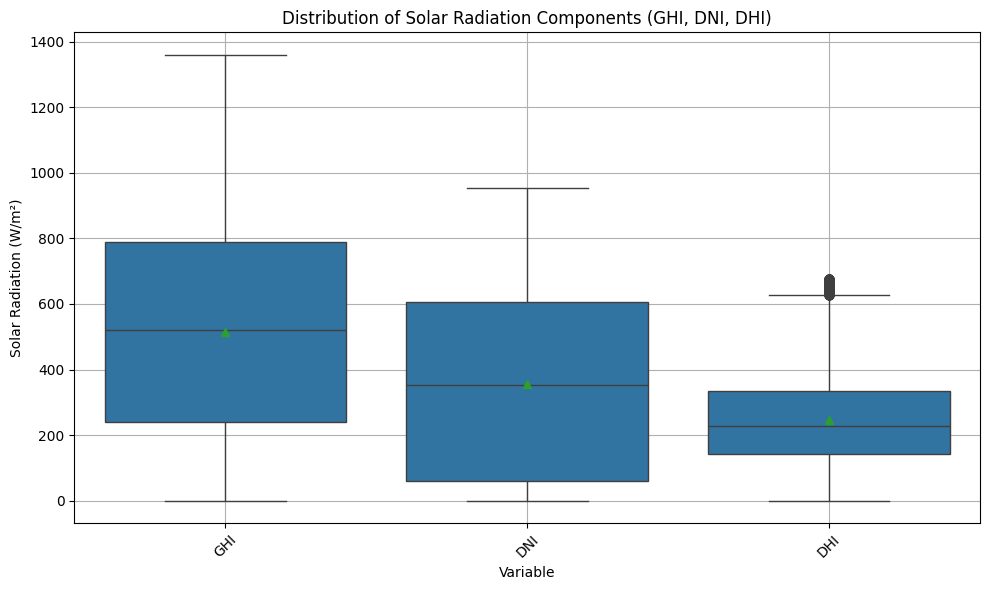

In [19]:
# Create a figure for box plots
plt.figure(figsize=(10, 6))

# Box plots for solar radiation components (GHI, DNI, DHI)
sns.boxplot(
    x="variable",
    y="value",
    showmeans=True,
    data=pd.melt(df[['GHI', 'DNI', 'DHI']], var_name="variable", value_name="value")
)

# Customize the plot (optional)
plt.xlabel('Variable')
plt.ylabel('Solar Radiation (W/m²)')
plt.title('Distribution of Solar Radiation Components (GHI, DNI, DHI)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

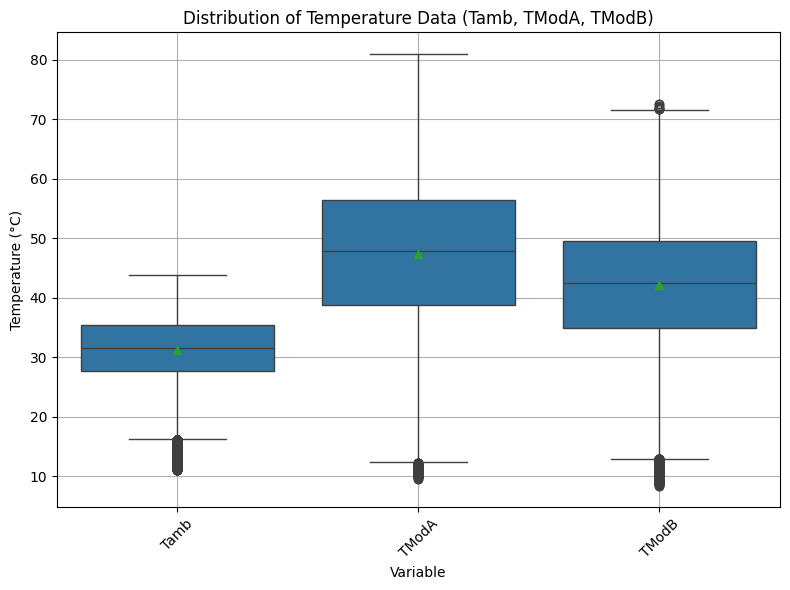

In [20]:
# Create a figure for box plots
plt.figure(figsize=(8, 6))

# Box plots for temperature variables (Tamb, TModA, TModB)
sns.boxplot(
    x="variable",
    y="value",
    showmeans=True,
    data=pd.melt(df[['Tamb', 'TModA', 'TModB']], var_name="variable", value_name="value")
)

# Customize the plot (optional)
plt.xlabel('Variable')
plt.ylabel('Temperature (°C)')
plt.title('Distribution of Temperature Data (Tamb, TModA, TModB)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot

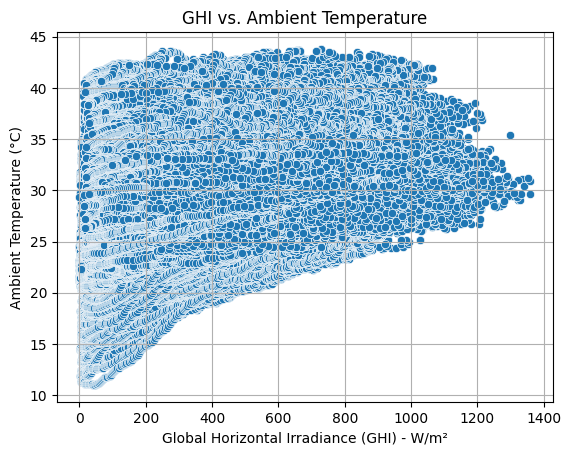

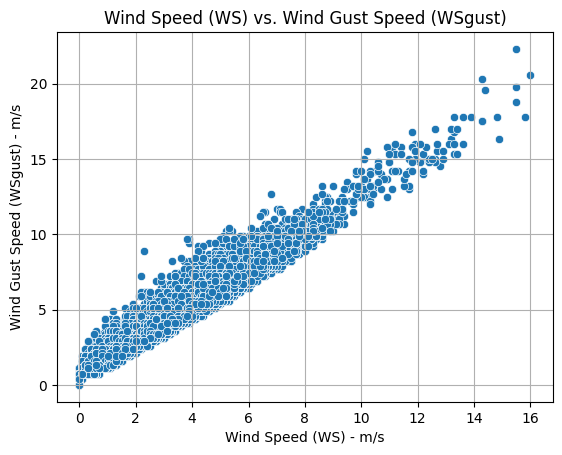

In [21]:
# Scatter plot for GHI vs Tamb
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.xlabel('Global Horizontal Irradiance (GHI) - W/m²')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs. Ambient Temperature')
plt.grid(True)
plt.show()

# Scatter plot for WS vs WSgust
sns.scatterplot(x='WS', y='WSgust', data=df)
plt.xlabel('Wind Speed (WS) - m/s')
plt.ylabel('Wind Gust Speed (WSgust) - m/s')
plt.title('Wind Speed (WS) vs. Wind Gust Speed (WSgust)')
plt.grid(True)
plt.show()